In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Transformed2.csv')
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
data.head(5)


,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay,Waterfront_view_Yes,Ever_Renovated_Yes,Zipcode_group_Zipcode_Group_1,Zipcode_group_Zipcode_Group_2,Zipcode_group_Zipcode_Group_3,Zipcode_group_Zipcode_Group_4,Zipcode_group_Zipcode_Group_5,Zipcode_group_Zipcode_Group_6,Zipcode_group_Zipcode_Group_7,Zipcode_group_Zipcode_Group_8,Zipcode_group_Zipcode_Group_9
0,7.129301e+09,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7.0,1180.0,0.0,63.0,47.5112,-122.257,1340.0,5650.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.414100e+09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7.0,2170.0,400.0,67.0,47.7210,-122.319,1690.0,7639.0,26.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
2,5.631500e+09,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6.0,770.0,0.0,85.0,47.7379,-122.233,2720.0,8062.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2.487201e+09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7.0,1050.0,910.0,53.0,47.5208,-122.393,1360.0,5000.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.954401e+09,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8.0,1680.0,0.0,31.0,47.6168,-122.045,1800.0,7503.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# Scaling Dataset

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns=['Sale_Price']))
X = pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay,Waterfront_view_Yes,Ever_Renovated_Yes,Zipcode_group_Zipcode_Group_1,Zipcode_group_Zipcode_Group_2,Zipcode_group_Zipcode_Group_3,Zipcode_group_Zipcode_Group_4,Zipcode_group_Zipcode_Group_5,Zipcode_group_Zipcode_Group_6,Zipcode_group_Zipcode_Group_7,Zipcode_group_Zipcode_Group_8,Zipcode_group_Zipcode_Group_9
0,0.885986,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,0.637358,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,0.735132,-0.597003,-0.089574,-0.087181,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,0.365299,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,-0.727767,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-1.360300,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.912987,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Checking and Removing Multicollinearity

In [3]:
X.corr()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay,Waterfront_view_Yes,Ever_Renovated_Yes,Zipcode_group_Zipcode_Group_1,Zipcode_group_Zipcode_Group_2,Zipcode_group_Zipcode_Group_3,Zipcode_group_Zipcode_Group_4,Zipcode_group_Zipcode_Group_5,Zipcode_group_Zipcode_Group_6,Zipcode_group_Zipcode_Group_7,Zipcode_group_Zipcode_Group_8,Zipcode_group_Zipcode_Group_9
ID,1.000000,0.001450,0.005233,-0.012379,-0.132153,0.018653,0.011552,0.013762,-0.010724,-0.005189,-0.021524,-0.001983,0.020720,-0.002913,-0.138843,-0.016227,-0.009553,0.030878,-0.025461,-0.012088,-0.002733,-0.016973,-0.039306,-0.023844,-0.000111,0.090229,-0.082130,0.003156,0.009586,-0.016330,-0.013811
No of Bedrooms,0.001450,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198,0.028148,0.004778,-0.008847,-0.051957,-0.006578,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.005233,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551,-0.034281,0.190440,-0.166037,-0.077419,0.063761,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),-0.012379,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503,-0.018182,0.102627,-0.083995,-0.065334,0.103841,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),-0.132153,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835,-0.014503,-0.011334,0.013033,0.037619,0.021605,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.018653,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901,-0.120524,0.317934,-0.257680,-0.055951,0.023719,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.011552,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.093546,0.034392,-0.037127,0.022690,-0.018557,0.401856,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.013762,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388,-0.082628,0.197510,-0.140113,-0.090561,0.070332,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),-0.010724,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491,-0.088424,0.194517,-0.142458,-0.058931,0.072099,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),-0.005189,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158,0.127876,-0.151347,0.092539,-0.025312,0.080595,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775


In [4]:
## pair of independent variables having corelation greater than or equal to 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# calculating VIF

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

#Calculating the variance influence factor for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF

ID                                              1.041820
No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374993
Flat Area (in Sqft)                          1481.788910
Lot Area (in Sqft)                              2.113686
No of Floors                                    2.127787
No of Times Visited                             1.433488
Overall Grade                                   2.968420
Area of the House from Basement (in Sqft)    1205.625693
Basement Area (in Sqft)                       345.489923
Age of House (in Years)                         2.629593
Latitude                                        2.471731
Longitude                                       1.675652
Living Area after Renovation (in Sqft)          3.068170
Lot Area after Renovation (in Sqft)             2.154157
Years since renovation                          2.788098
Condition_of_house_Excellent                   53.579546
Condition_of_house_Fair        

In [6]:
VIF[VIF == VIF.max()].index[0]


'Flat Area (in Sqft)'

In [7]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print('{} column was removed'.format(vif[vif ==vif.max()].index[0]))
    data = data.drop(columns = [vif[vif ==vif.max()].index[0]])
    return data
  else:
    print('NO COlUMNS WERE REMOVED')
    return data

In [8]:
len(VIF[VIF > 5])

7

In [9]:
for i in range(len(VIF[VIF > 5])):
  vif_data = MC_remover(vif_data)

vif_data.drop(columns = ['ID'], inplace = True)
vif_data.head()

Flat Area (in Sqft) column was removed
Condition_of_house_Fair column was removed
NO COlUMNS WERE REMOVED
NO COlUMNS WERE REMOVED
NO COlUMNS WERE REMOVED
NO COlUMNS WERE REMOVED
NO COlUMNS WERE REMOVED


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since renovation,Condition_of_house_Excellent,Condition_of_house_Good,Condition_of_house_Okay,Waterfront_view_Yes,Ever_Renovated_Yes,Zipcode_group_Zipcode_Group_1,Zipcode_group_Zipcode_Group_2,Zipcode_group_Zipcode_Group_3,Zipcode_group_Zipcode_Group_4,Zipcode_group_Zipcode_Group_5,Zipcode_group_Zipcode_Group_6,Zipcode_group_Zipcode_Group_7,Zipcode_group_Zipcode_Group_8,Zipcode_group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,-0.597003,-0.089574,-0.087181,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,-0.597003,-0.089574,-0.087181,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Remaining columns

In [10]:
VIF = pd.Series([variance_inflation_factor(vif_data.values , i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF , len(VIF)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years since renovation                       2.788064
 Condition_of_house_Excellent                 1.206487
 Condition_of_house_Good                      1.251488
 Condition_of_house_Okay                      1.025386
 Waterfront_view_Yes                          1.208288
 Ever_Reno

# Train/Test set


In [11]:
x = vif_data
y = data['Sale_Price']

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3,random_state = 101)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# Implementing the Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
# lr.fit() is used to apply the gradient descent and get the best value for the parameters
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [14]:
# It is used to show the coefficient of the independent variable m1,m2,m3,...
# We should note m0 = 0 since we have normalized the data
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  10761.77007875,  14594.33847962,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [15]:
predictions = lr.predict(x_test)
## The score function is used to find th R^2 of the test sets
lr.score(x_test,y_test)

0.8461987715586199

# Residuals

In [16]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals':residuals,
                                'predictions':predictions})
residual_table = residual_table.sort_values(by='predictions')

In [17]:
# Regression line
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

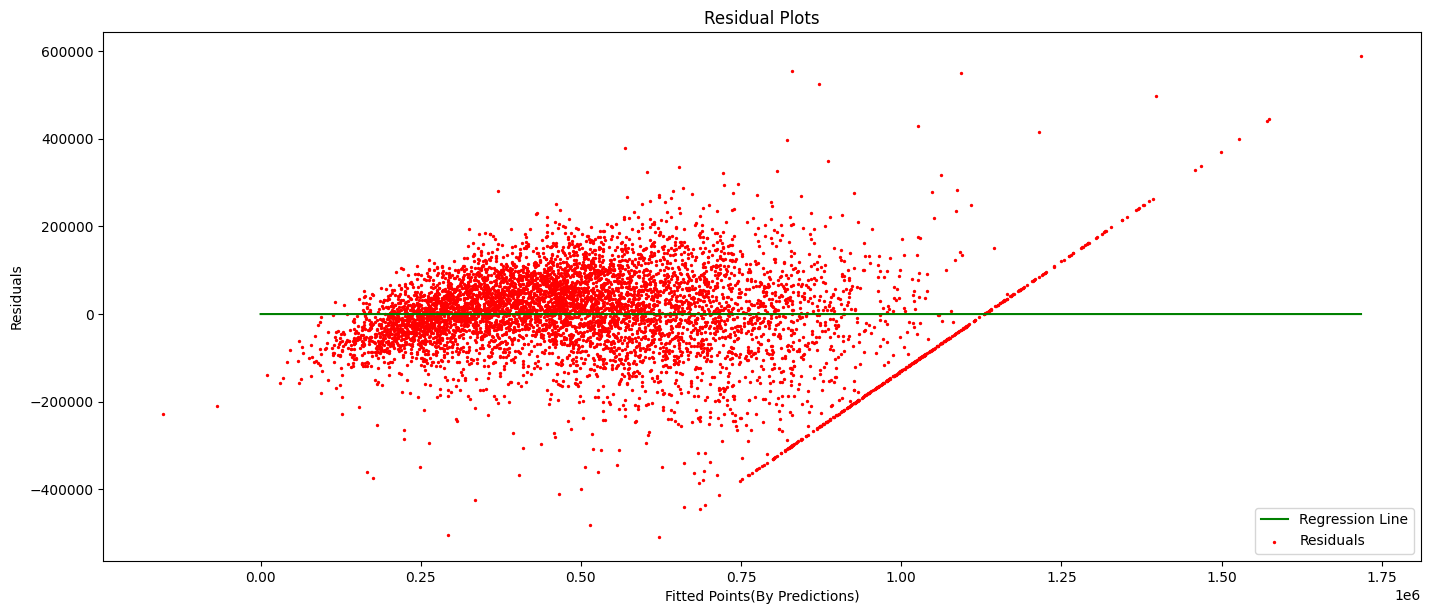

In [18]:
plt.figure(dpi = 100,figsize=(17,7))
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2,label='Residuals')
plt.plot(z,k,color='green',label='Regression Line')
plt.xlabel('Fitted Points(By Predictions)')
plt.ylabel('Residuals')
plt.title('Residual Plots')
plt.legend(loc=4)
plt.show()

# Distribution of error terms


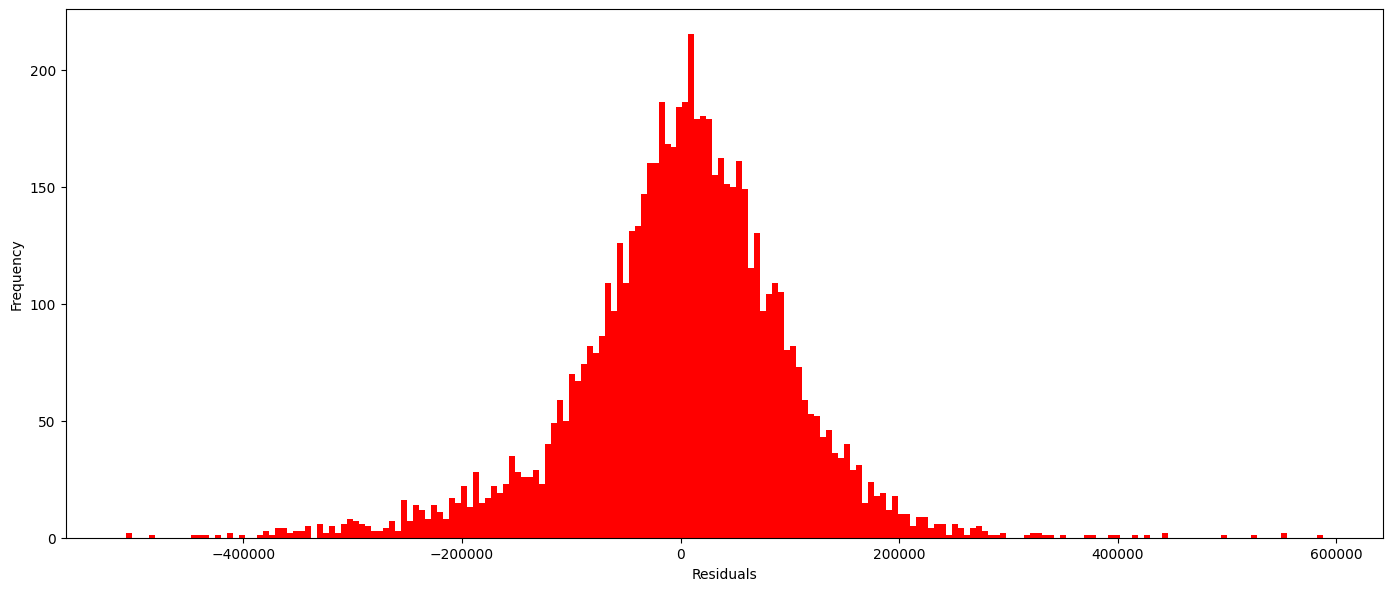

In [19]:
plt.figure(dpi =100,figsize=(17,7))
plt.hist(residual_table['residuals'],color='red',bins = 200)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Model Coefficients

In [20]:
coefficients_table=pd.DataFrame({'Columns':x_train.columns,
                                 'coefficients':lr.coef_})
coefficients_table=coefficients_table.sort_values(by='coefficients')

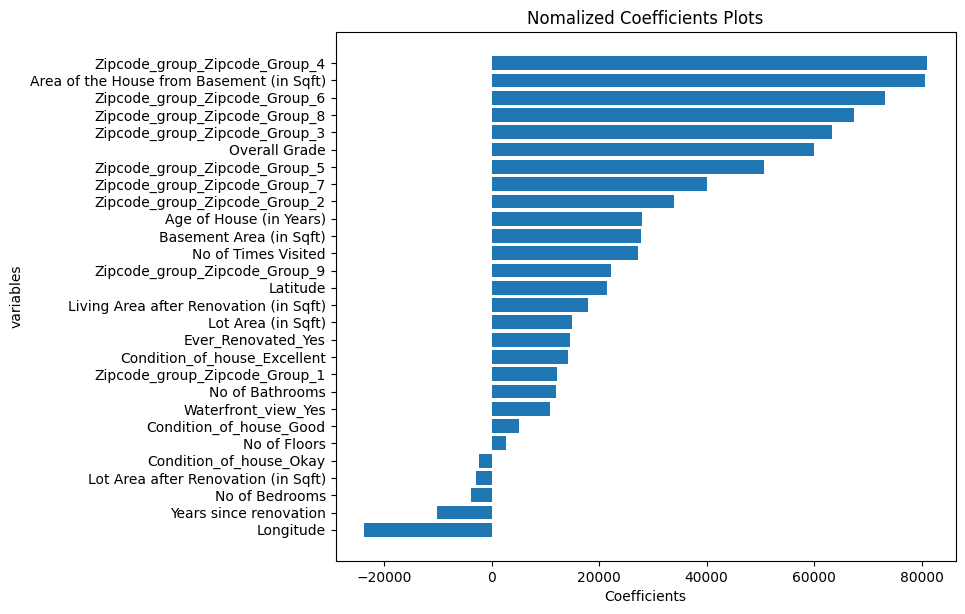

In [21]:
plt.figure(figsize=(8,7),dpi = 100)
plt.barh(coefficients_table['Columns'],coefficients_table['coefficients'])
plt.xlabel('Coefficients')
plt.ylabel('variables')
plt.title('Nomalized Coefficients Plots')
plt.show()

# Feature Transformation

In [22]:
data2 = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Raw_Data3.csv')
data2.head()

,Unnamed: 0,Unnamed: 0.1,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0,0.0,7.129301e+09,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,None,Fair,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,1,1.0,6.414100e+09,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,None,Fair,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2,2.0,5.631500e+09,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,None,Fair,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,3,3.0,2.487201e+09,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,None,Excellent,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,4,4.0,1.954401e+09,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,None,Fair,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [23]:
sum(data2.isnull().sum())

0

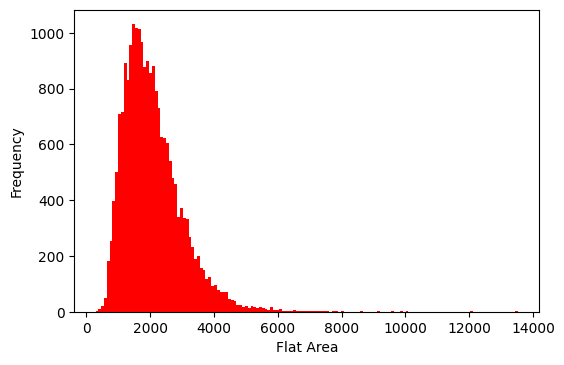

In [24]:
# We see that the distribution is right skewed
plt.figure(dpi =100)
plt.hist(data2['Flat Area (in Sqft)'],color = 'red',bins = 150)
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.show()

In [25]:
def log_transform(sample_data):
  return np.log(sample_data)

In [26]:
data2['Transform Flat Area']=data2['Flat Area (in Sqft)'].map(log_transform)


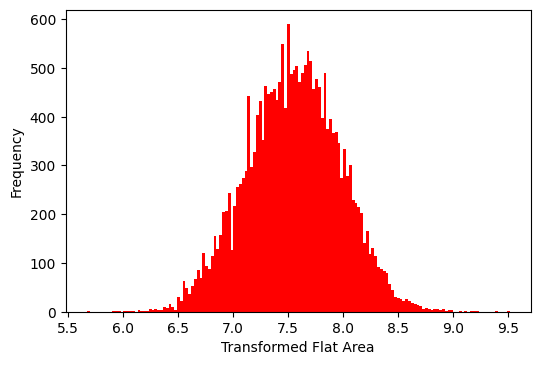

In [27]:
plt.figure(dpi = 100)
plt.hist(data2['Transform Flat Area'],color = 'red', bins=150)
plt.xlabel('Transformed Flat Area')
plt.ylabel('Frequency')
plt.show()

#Label Encoding

In [28]:
label_encoding=data2['Condition of the House']
label_encoding.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [29]:
label_encoding = label_encoding.map({'Bad':1,
                                     'Okay':2,
                                     'Fair':3,
                                     'Good':4,
                                     'Excellent':5
                                     })
label_encoding.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# Binning

In [30]:
data2['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [31]:
data2['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [32]:
mean = []
for i in data2['Condition of the House'].unique():
  mean.append(data2['Sale Price'][data2['Condition of the House']==str(i)].mean())

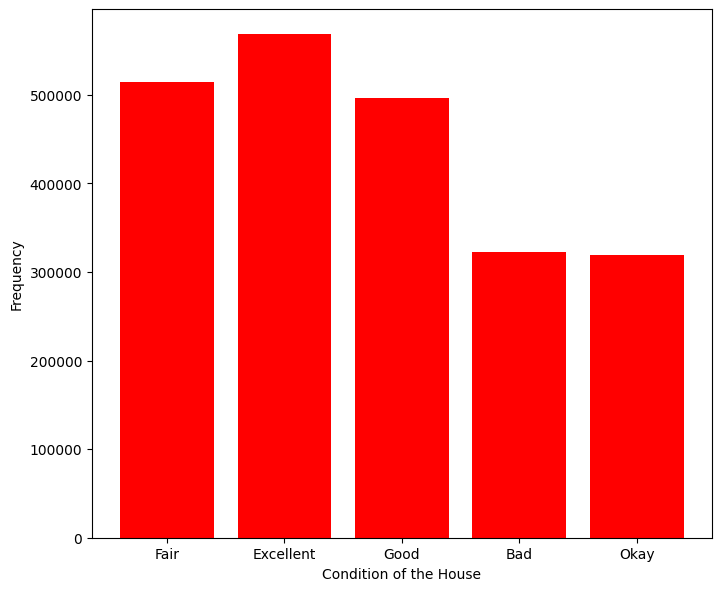

In [33]:
plt.figure(dpi=100,figsize=(8,7))
plt.bar(data2['Condition of the House'].unique(),mean,color='Red')
plt.xlabel('Condition of the House')
plt.ylabel('Frequency')
plt.show()

# Since the values of bad an okay are almost same they can be binned together
Also the same for Fair and Good

In [34]:
mapping = {'Excellent':'Excellent',
           'Fair':'Good',
           'Good':'Good',
           'Okay':'Okay',
           'Bad':'Okay'}
data2['Condition of the House']=data2['Condition of the House'].map(mapping)           

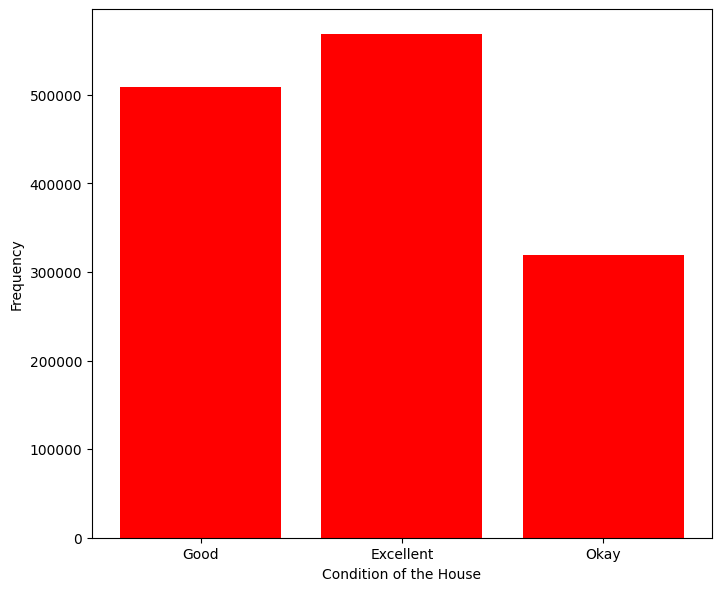

In [35]:
mean = []
for i in data2['Condition of the House'].unique():
  mean.append(data2['Sale Price'][data2['Condition of the House']==str(i)].mean())
plt.figure(dpi=100,figsize=(8,7))
plt.bar(data2['Condition of the House'].unique(),mean,color='Red')
plt.xlabel('Condition of the House')
plt.ylabel('Frequency')
plt.show()

In [36]:
'''Binning Continous Variables '''
len(data2['Age of House (in Years)'].unique())

116

In [37]:
data2['Age of House (in Years)'].max()

118.0

In [38]:
data2['Age of House (in Years)'].min()

3.0

In [39]:
def age_of_house(data):
  if data < 10:
    data = 'new'
  elif data>=10 and data < 50:
    data = 'Old'
  else:
    data = 'Very Old'
  return data

In [40]:
cat_house_age = data2['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['Very Old', 'Old', 'new'], dtype=object)

# Dimensionality Reduction

## Missing Value Ratio

In [41]:
data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/NaN_Housing_Prices.csv')
data.head()


,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,NaN,7,1180.0,NaN,63,47.5112,-122.257,1340.0,5650,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,NaN,7,2170.0,400.0,67,47.7210,-122.319,1690.0,7639,26.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,NaN,6,770.0,NaN,85,47.7379,-122.233,2720.0,8062,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,NaN,7,1050.0,910.0,53,47.5208,-122.393,1360.0,5000,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,NaN,8,1680.0,NaN,31,47.6168,-122.045,1800.0,7503,NaN,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
data.isnull().sum()

Sale_Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
No of Times Visited                          19485
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                      13123
Age of House (in Years)                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (in Sqft)           0
Lot Area after Renovation (in Sqft)              0
Years Since Renovation                       20695
Condition_of_the_House_Excellent                 0
Condition_of_the_House_Fair                      0
Condition_of_the_House_Good                      0
Condition_of_the_House_Okay    

In [43]:
for i in data.columns:
  tmp = data[i].isnull().sum()/len(data)
  if tmp > 0.70:
    print('Removed '+i+' Column with missing value ratio ',tmp)
    data = data.drop(columns = [i])

Removed No of Times Visited Column with missing value ratio  0.9017076218242399
Removed Years Since Renovation Column with missing value ratio  0.9577028090147623


In [44]:
data.isnull().sum()

Sale_Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                      13123
Age of House (in Years)                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (in Sqft)           0
Lot Area after Renovation (in Sqft)              0
Condition_of_the_House_Excellent                 0
Condition_of_the_House_Fair                      0
Condition_of_the_House_Good                      0
Condition_of_the_House_Okay                      0
Ever_Renovated_Yes                               0
Waterfront_View_Yes            

## Low Variance Removal

In [45]:
data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Raw_Housing_Prices.csv')
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [46]:
data.dropna(axis = 0,how = 'any',inplace=True)
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [47]:
# Isolating all the numerical columns
numerical_data = data.drop(columns = ['ID','Date House was Sold','Sale Price','Waterfront View','No of Times Visited','Condition of the House',
                                      'Overall Grade','Zipcode'])
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21580 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             21580 non-null  int64  
 1   No of Bathrooms                            21580 non-null  float64
 2   Flat Area (in Sqft)                        21580 non-null  float64
 3   Lot Area (in Sqft)                         21580 non-null  float64
 4   No of Floors                               21580 non-null  float64
 5   Area of the House from Basement (in Sqft)  21580 non-null  float64
 6   Basement Area (in Sqft)                    21580 non-null  int64  
 7   Age of House (in Years)                    21580 non-null  int64  
 8   Renovated Year                             21580 non-null  int64  
 9   Latitude                                   21580 non-null  float64
 10  Longitude             

In [48]:
from sklearn.preprocessing import Normalizer
# We do not use the standardscaler since it changes the variance to 1
norm = Normalizer()
norm_data = norm.fit_transform(numerical_data)

norm_data = pd.DataFrame(norm_data,columns = numerical_data.columns)
norm_data.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.000363,0.000121,0.142628,0.682924,0.000121,0.142628,0.000000,0.007615,0.000000,0.005743,-0.014777,0.161968,0.682924
1,0.000264,0.000198,0.226174,0.637335,0.000176,0.190972,0.035202,0.005896,0.175219,0.004200,-0.010765,0.148729,0.672273
2,0.000152,0.000076,0.058440,0.758961,0.000076,0.058440,0.000000,0.006451,0.000000,0.003623,-0.009277,0.206437,0.611874
3,0.000527,0.000395,0.258159,0.658569,0.000132,0.138299,0.119859,0.006981,0.000000,0.006259,-0.016121,0.179131,0.658569
4,0.000263,0.000175,0.147072,0.707346,0.000088,0.147072,0.000000,0.002714,0.000000,0.004169,-0.010684,0.157577,0.656834


In [49]:
# Storing the variance of the different columns
tmp = norm_data.var()
tmp

No of Bedrooms                               4.069835e-08
No of Bathrooms                              2.802131e-08
Flat Area (in Sqft)                          1.230124e-02
Lot Area (in Sqft)                           1.350318e-02
No of Floors                                 3.008559e-08
Area of the House from Basement (in Sqft)    1.010387e-02
Basement Area (in Sqft)                      1.646366e-03
Age of House (in Years)                      2.001317e-05
Renovated Year                               1.681697e-03
Latitude                                     1.077307e-05
Longitude                                    7.105433e-05
Living Area after Renovation (in Sqft)       1.078880e-02
Lot Area after Renovation (in Sqft)          1.249549e-02
dtype: float64

We need to choose the variance threshold very carefully like the missing ratio
threshold

In [50]:
# For simplicity we choose Threshold Variance as 0.0001
T = 1e-04

for i in tmp:
  if i < T:
    norm_data.drop(columns = [tmp[tmp == i].index[0]],inplace = True)
norm_data.var()

Flat Area (in Sqft)                          0.012301
Lot Area (in Sqft)                           0.013503
Area of the House from Basement (in Sqft)    0.010104
Basement Area (in Sqft)                      0.001646
Renovated Year                               0.001682
Living Area after Renovation (in Sqft)       0.010789
Lot Area after Renovation (in Sqft)          0.012495
dtype: float64

# Forward Selection

In [51]:
def adj_r2(data_x,data_y,predictions):
  from sklearn.metrics import r2_score
  R = r2_score(data_y,predictions)
  n = len(data_y)
  m = len(data_x.columns)
  adj_R = 1 - ((1-R)*(n-1)/(n-m-1))
  return adj_R

In [52]:
adj_r2(x_test,y_test,predictions)


0.8455315211098503

Thus from above adjusted R^2 is slightly lesser than R^2. This shows that there are some features that do not add any significance to the model

In [53]:
def return_r2(X , Y, model):
  '''
  X = Independent variable
  Y = Target Variable
  model = predictive model
  '''
  model.fit(X,Y)
  pred = model.predict(X)
  m = len(X.columns)
  r2 = adj_r2(X ,Y, pred)
  return r2

In [54]:
def forward_selection(model , X , Y , max_features):
  '''
  X = Independent variable
  Y = Target Variable
  model = predictive model
  max _features = selects best maximum feature upto max_feature value
  
  Returns Rmax : Adjusted r2 of the final model
  history : returns list of Rmax at every new independent variable being added to the model
  x[f_col]: Best feature upto the max_features
  '''
  f_col = []
  history = []
  for i in range(max_features):
    f_col.append('blank')
    tmp = f_col[:]
    Rmax = -1
    for var in X.columns:
      tmp[-1] = var
      r2 = return_r2(X[tmp],Y,model)
      if r2 >= Rmax:
        Rmax = r2
        f_col[-1] = var
        elim =var
    print("Selected ",f_col[-1]," with new R2 = ",Rmax)
    history.append(Rmax)
  return Rmax , history , X[f_col]


In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score , history , sel_data = forward_selection(lr , x_train , y_train , 5)

Selected  Overall Grade  with new R2 =  0.46330521459442986
Selected  Latitude  with new R2 =  0.5719394706222798
Selected  Living Area after Renovation (in Sqft)  with new R2 =  0.6259771955140172
Selected  Age of House (in Years)  with new R2 =  0.6707670543852546
Selected  No of Bathrooms  with new R2 =  0.7003064994858661


# Backward Elimination

In [71]:
def backward_elimination(model , X , Y , min_features):
  '''
  X = Independent variable
  Y = Target Variable
  model = predictive model
  min _features = eliminates worst features until only min_features are left
  '''
  elim_data = X[:]
  r2_history = []
  base_r2 = return_r2(elim_data,Y,model)
  print('Base R2 is ',base_r2)
  for i in range(X.shape[1]-min_features): #The code had range(X.shape[1]-min_features) which gave wrong number of output
    difference = -100
    for var in elim_data.columns:
      tmp = elim_data.drop(columns =[var])
      r2 = return_r2(tmp,Y,model)
      if (r2 - base_r2) > difference:
        difference = r2 - base_r2
        eliminate = var
        new_r2 = r2
    
    elim_data.drop(columns = [eliminate],inplace = True)
    r2_history.append(new_r2)
    print(eliminate," Eliminated with r2 ",new_r2)
    base_r2 = new_r2
  return base_r2 , r2_history , elim_data


In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score , history , survived_data = backward_elimination(lr,x_train,y_train,15)

Base R2 is  0.8409462124647622
No of Floors  Eliminated with r2  0.8409014194514582
Lot Area after Renovation (in Sqft)  Eliminated with r2  0.8408460809601316
Condition_of_house_Okay  Eliminated with r2  0.8407652282453583
No of Bedrooms  Eliminated with r2  0.8406289971591607
Condition_of_house_Good  Eliminated with r2  0.8403221208948972
Years since renovation  Eliminated with r2  0.8398115632177104
Ever_Renovated_Yes  Eliminated with r2  0.8392722143762282
No of Bathrooms  Eliminated with r2  0.8382714088544515
Living Area after Renovation (in Sqft)  Eliminated with r2  0.8369767220336066
Waterfront_view_Yes  Eliminated with r2  0.8355203641776985
Zipcode_group_Zipcode_Group_1  Eliminated with r2  0.8338069251181028
Lot Area (in Sqft)  Eliminated with r2  0.8316939345427641
Condition_of_house_Excellent  Eliminated with r2  0.8294061589140227


In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score , history , survived_data = backward_elimination(lr,x_train,y_train,1)
print(history)

Base R2 is  0.8409462124647622
No of Floors  Eliminated with r2  0.8409014194514582
Lot Area after Renovation (in Sqft)  Eliminated with r2  0.8408460809601316
Condition_of_house_Okay  Eliminated with r2  0.8407652282453583
No of Bedrooms  Eliminated with r2  0.8406289971591607
Condition_of_house_Good  Eliminated with r2  0.8403221208948972
Years since renovation  Eliminated with r2  0.8398115632177104
Ever_Renovated_Yes  Eliminated with r2  0.8392722143762282
No of Bathrooms  Eliminated with r2  0.8382714088544515
Living Area after Renovation (in Sqft)  Eliminated with r2  0.8369767220336066
Waterfront_view_Yes  Eliminated with r2  0.8355203641776985
Zipcode_group_Zipcode_Group_1  Eliminated with r2  0.8338069251181028
Lot Area (in Sqft)  Eliminated with r2  0.8316939345427641
Condition_of_house_Excellent  Eliminated with r2  0.8294061589140227
Longitude  Eliminated with r2  0.8261145030651567
Zipcode_group_Zipcode_Group_2  Eliminated with r2  0.8213877113640011
Zipcode_group_Zipcode_

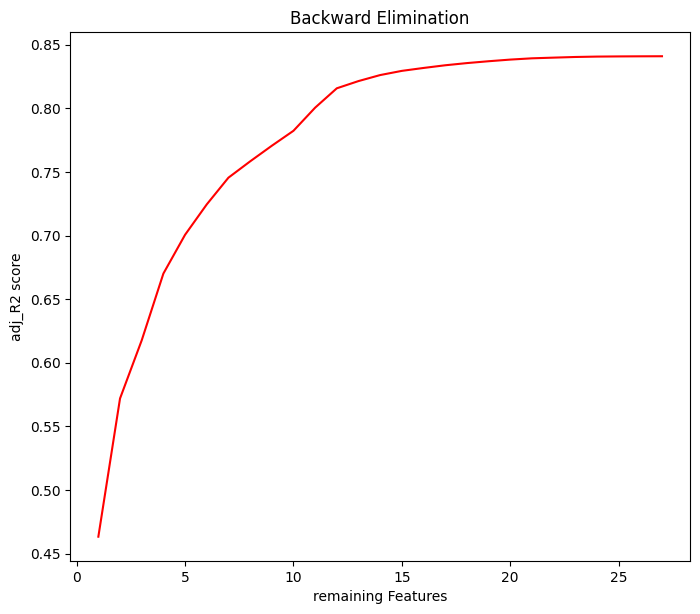

In [74]:
plt.figure(dpi = 100,figsize = (8,7))
plt.plot(range(len(history),0,-1),history,color='red')
plt.xlabel('remaining Features')
plt.ylabel('adj_R2 score')
#plt.yticks([z/100 for z in range()])
plt.title('Backward Elimination')
plt.show()